`THE FASHION MNIST IDENTIFICATION PROJECT`
This notebook contains the use of the fashionMNIST data set from the TensorFlow data
for the application of Machine Learning and Deep Neural Network for the image prediction.
The Dataset obtained has been split to 60,000 images for training and 10,000 images for
testing

In [37]:

# Load the dataset
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [38]:
#Let's view the dimensions of the data that we have loaded
print(f"""
train images shape:{train_images.shape},
test images shape :{test_images.shape},
train labels shape:{train_labels.shape},
test labels shape:{test_labels.shape}
""")


train images shape:(60000, 28, 28),
test images shape :(10000, 28, 28),
train labels shape:(60000,),
test labels shape:(10000,)



Notice that the images have a dimension of 28 x 28

Now lets plot the image

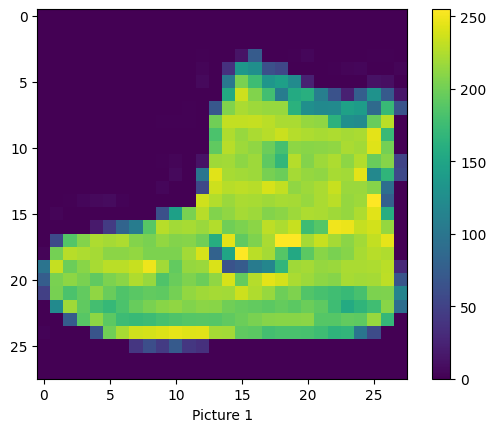

In [39]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
plt.colorbar()
plt.xlabel("Picture 1")
plt.grid(False)
plt.show()

Notice in "Picture 1" the colormap shows that 255 different shades so inorder to reduce
the noise in the model "Since the model predicts the item not the color" we will divide
both training and test data to become a binary value of 0 and 1

In [41]:
train_images = train_images / 255.0
test_images = test_images / 255.0
print(train_images.shape)

(60000, 28, 28)


Let's plot to see if it worked!

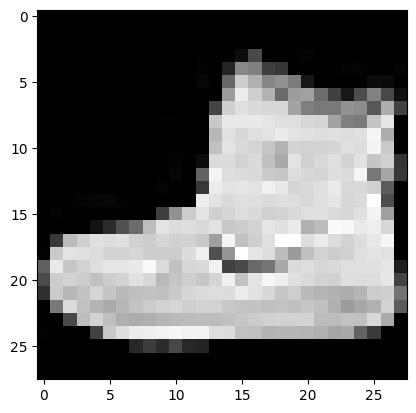

In [42]:
plt.imshow(train_images[0],cmap=plt.get_cmap('gray'))

Although we have changed the colormap to grey observe the right side of the image above
where there is no shades in the image

Let us check for even a whole range of data

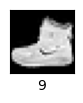

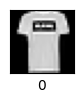

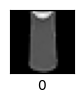

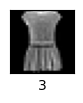

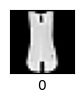

In [43]:
#Check

for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
    plt.xlabel(train_labels[i])
    plt.grid(True)
    plt.show()

Since we have already seen our dataset we will identify our labels

0: T-shirt/top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle boot


**Now for the construction of the neural network First we will use a simple Vanilla Neural network**

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [50]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')

])

In [51]:
model.compile(
    loss=sparse_categorical_crossentropy,
    optimizer=Adam(0.001),
    metrics=['accuracy']
)

In [56]:
cv_images,data_test,cv_labels,label_test = train_test_split(test_images,test_labels,test_size=0.5,random_state=42)
print(f"""
cv_images shape:{cv_images.shape},
cv_labels shape:{cv_labels.shape},
data_test shape:{data_test.shape},
label_test shape:{label_test.shape}
""")


cv_images shape:(5000, 28, 28),
cv_labels shape:(5000,),
data_test shape:(5000, 28, 28),
label_test shape:(5000,)



In [57]:
model.fit(train_images,train_labels,
          epochs=10,
          validation_data=(cv_images,cv_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7919 - loss: 0.5748 - val_accuracy: 0.7958 - val_loss: 0.5590
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8171 - loss: 0.5152 - val_accuracy: 0.8120 - val_loss: 0.5284
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8303 - loss: 0.4777 - val_accuracy: 0.8244 - val_loss: 0.4933
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8394 - loss: 0.4501 - val_accuracy: 0.8310 - val_loss: 0.4754
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8461 - loss: 0.4294 - val_accuracy: 0.8348 - val_loss: 0.4584
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8513 - loss: 0.4135 - val_accuracy: 0.8350 - val_loss: 0.4590
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8561 - loss: 0.4001 - val_accuracy: 0.8432 - val_loss: 0.4382
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8605 - loss: 0

Now the obtained validation accuracy is 85.14% Now let's evaluate for the test data

In [60]:
test_loss,test_acc = model.evaluate(data_test,label_test)
print(f"""
Test accuracy: {test_acc}
Test loss: {test_loss}""")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8578 - loss: 0.4030

Test accuracy: 0.8578000068664551
Test loss: 0.4030432403087616


Now the model is doing quite well since the training, validation and test accuracies are approximately or relatively the same
But this model tends to perform poorly due comparison since models designed but CNN have achieved more outstanding accuracies

`For prediction`

In [67]:
from tensorflow.keras.layers import Softmax
probability_model = Sequential([
    model,
    Softmax()
                               ])

In [68]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


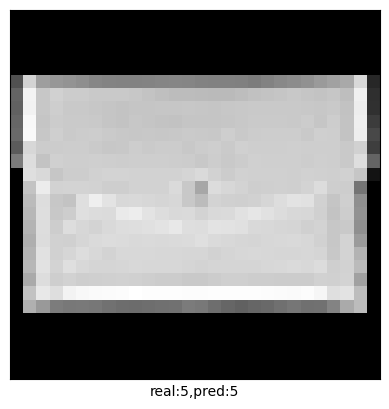

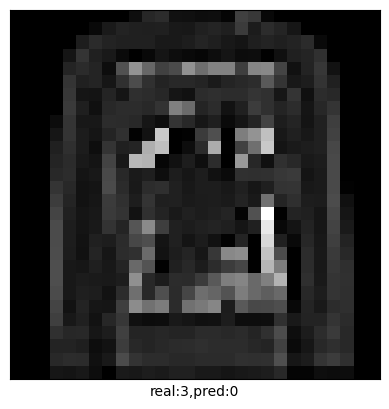

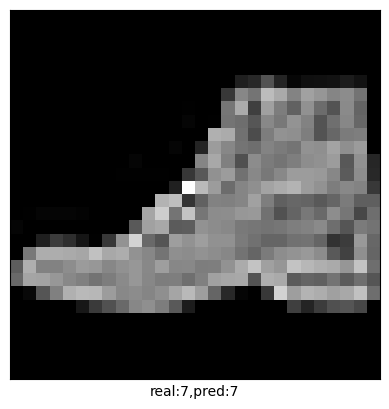

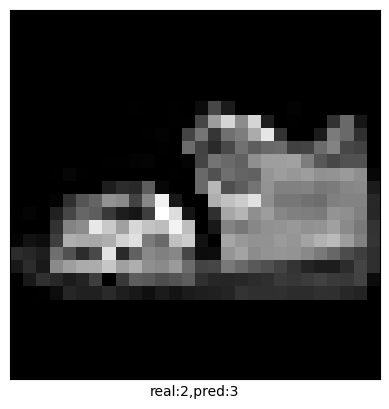

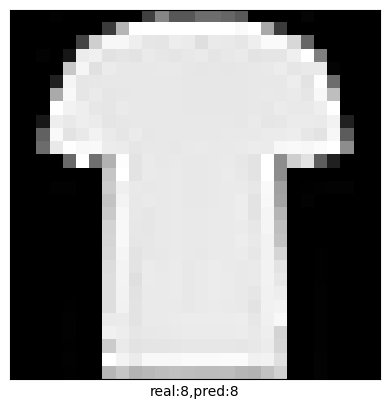

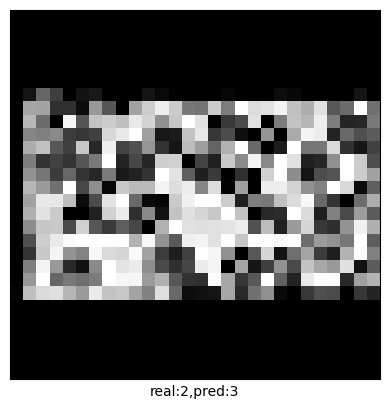

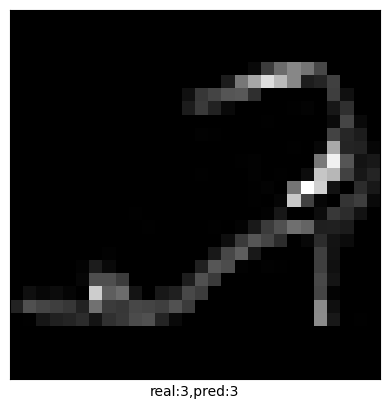

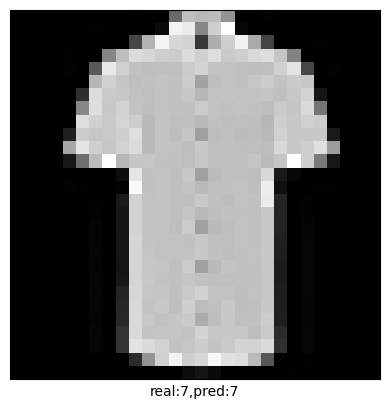

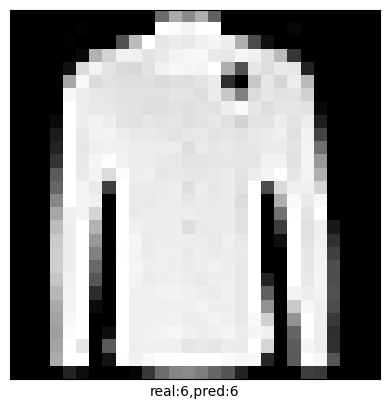

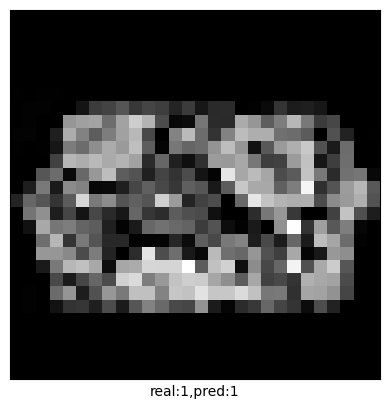

In [72]:
import numpy as np
for i in np.random.randint(low=1,high=5000,size=10):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
    plt.xlabel(f"real:{test_labels[i]},pred:{np.argmax(predictions[i])}")
    plt.grid(True)
    plt.show()

Since our model is not very accurate it predicted 8/10 correct values in the random set of test values thus proving it to have a probability of 80 percent